In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

Font 'default' does not have a glyph for '\u683c' [U+683c], substituting with a dummy symbol.


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21097 (\N{CJK UNIFIED IDEOGRAPH-5269}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20313 (\N{CJK UNIFIED IDEOGRAPH-4F59}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have a glyph for '\u4ef7' [U+4ef7], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u683c' [U+683c], substituting with a dummy symbol.


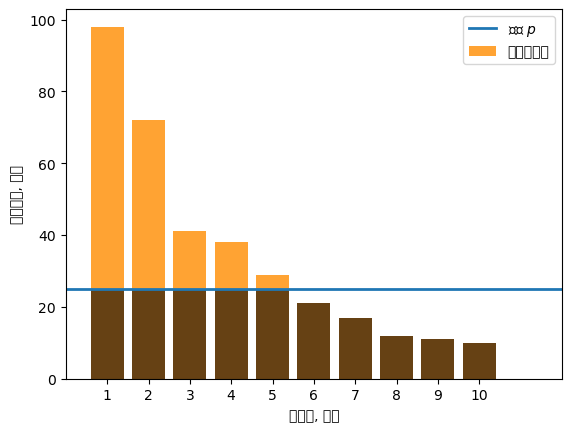

In [2]:
fig, ax = plt.subplots()
consumers = range(1, 11) # 消费者 1,..., 10
# 每个消费者的支付意愿
wtp = (98, 72, 41, 38, 29, 21, 17, 12, 11, 10)
price = 25
ax.bar(consumers, wtp, label="消费者剩余", color="darkorange", alpha=0.8)
ax.plot((0, 12), (price, price), lw=2, label="价格 $p$")
ax.bar(consumers, [min(w, price) for w in wtp], color="black", alpha=0.6)
ax.set_xlim(0, 12)
ax.set_xticks(consumers)
ax.set_ylabel("支付意愿, 价格")
ax.set_xlabel("消费者, 数量")
ax.legend()
plt.show()

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36870 (\N{CJK UNIFIED IDEOGRAPH-9006}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

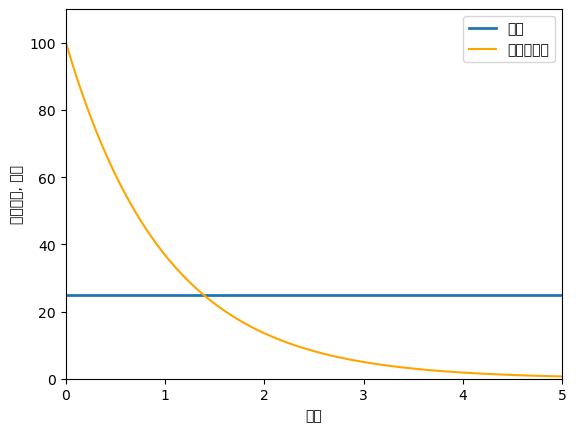

In [3]:
def inverse_demand(q):
    return 100 * np.exp(- q)

# 构建网格以在不同的 q 值处评估函数
q_min, q_max = 0, 5
q_grid = np.linspace(q_min, q_max, 1000)

# 绘制逆需求曲线
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="价格")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="逆需求曲线")
ax.set_ylabel("支付意愿, 价格")
ax.set_xlabel("数量")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.legend()
plt.show()

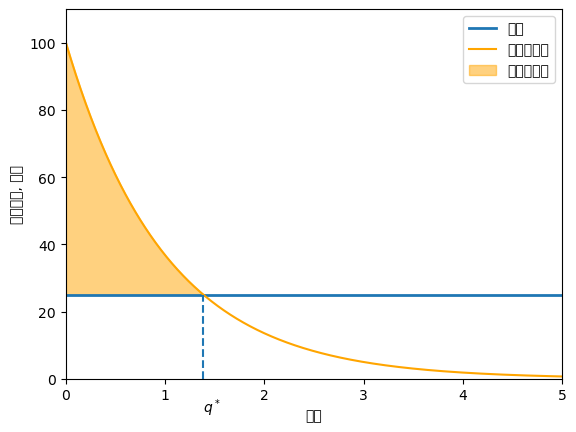

In [4]:
# solve for the value of q where demand meets price
q_star = np.log(100) - np.log(price)

fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="价格")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="逆需求曲线")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, np.full(len(small_grid), price),
                inverse_demand(small_grid), color="orange",
                alpha=0.5, label="消费者剩余")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("支付意愿, 价格")
ax.set_xlabel("数量")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

In [5]:
import scipy.integrate as spi

# 计算消费者剩余
integral, error = spi.quad(lambda q: inverse_demand(q) - price, 0., q_star)
integral

40.34264097200274

In [6]:
def finer_partition_integrate(f, a, b, num_intervals):
    x = np.linspace(a, b, num_intervals+1)
    h = x[1] - x[0]
    integral = sum(f(x[i]) * h for i in range(num_intervals))
    return integral

# 计算消费者剩余
finer_partition_integrate(lambda q: inverse_demand(q) - price, 0.0, q_star, 10000)

40.34783969597016

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24895 (\N{CJK UNIFIED IDEOGRAPH-613F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

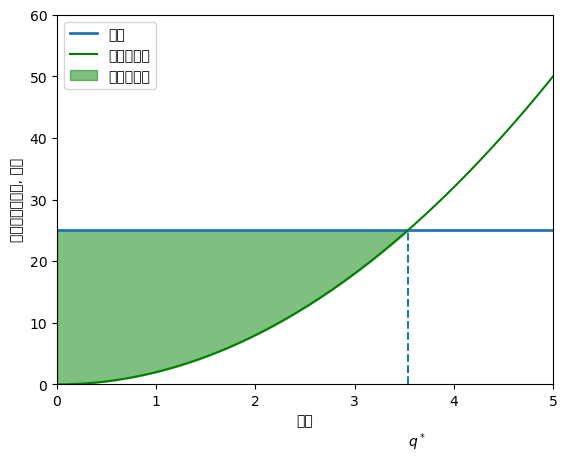

In [7]:
def inverse_supply(q):
    return 2 * q**2

# solve for the value of q where supply meets price
q_star = (price / 2)**(1/2)

# plot the inverse supply curve
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="价格")
ax.plot(q_grid, inverse_supply(q_grid), 
        color="green", label="逆供给曲线")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, inverse_supply(small_grid), 
                np.full(len(small_grid), price), 
                color="green",
                alpha=0.5, label="生产者剩余")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("愿意出售的价格, 价格")
ax.set_xlabel("数量")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 60)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

In [8]:
# 计算生产者剩余
integral, error = spi.quad(lambda q: price - inverse_supply(q), 0., q_star)
integral

58.925565098878955

In [9]:
# 计算生产者剩余
finer_partition_integrate(lambda q: price - inverse_supply(q), 0.0, q_star, 10000)

58.929984368947316

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25903 (\N{CJK UNIFIED IDEOGRAPH-652F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


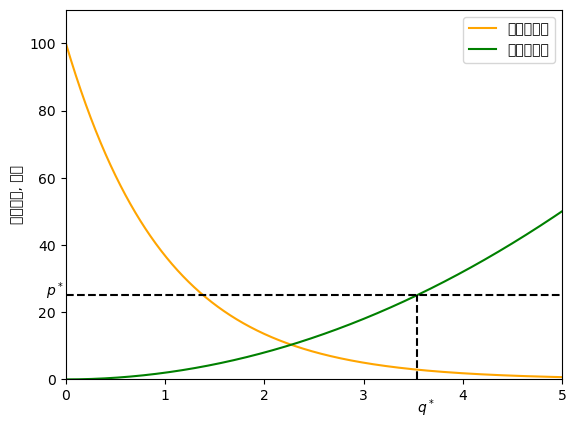

In [10]:
fig, ax = plt.subplots()
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="逆需求曲线")
ax.plot(q_grid, inverse_supply(q_grid), 
        color="green", label="逆供给曲线")

# 目前我们是假设之前已计算出均衡
ax.plot((q_star, q_star), (0, price), "k--")
ax.plot((0, q_max), (price, price), "k--")
ax.legend()
ax.set_xlim(0, q_max)
ax.set_ylim(0, 110)
ax.set_ylabel("支付意愿, 价格")
ax.text(q_star, -10, "$q^*$")
ax.text(-0.2, price, "$p^*$")
plt.show()

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


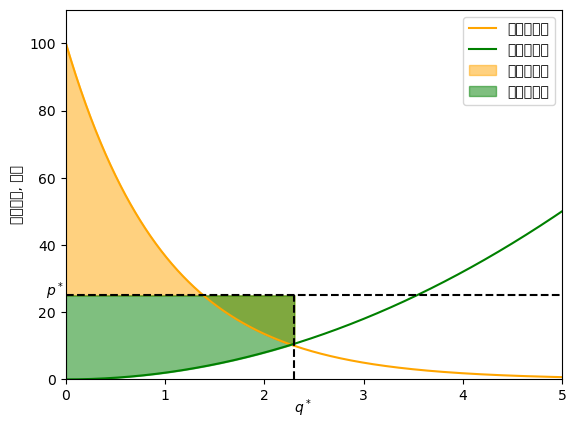

In [11]:
fig, ax = plt.subplots()
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="逆需求曲线")
ax.plot(q_grid, inverse_supply(q_grid), 
        color="green", label="逆供给曲线")
q_star = np.log(100) / 2
small_grid = np.linspace(0, q_star, 500)

ax.fill_between(small_grid, np.full(len(small_grid), price), 
                inverse_demand(small_grid), color="orange",
                alpha=0.5, label="消费者剩余")
ax.fill_between(small_grid, inverse_supply(small_grid), 
                np.full(len(small_grid), price), 
                color="green",
                alpha=0.5, label="生产者剩余")
ax.plot((q_star,q_star), (0, price), 'k--')
ax.plot((0, q_max), (price, price), 'k--')
ax.legend()
ax.set_xlim(0, q_max)
ax.set_ylim(0, 110)
ax.set_ylabel("支付意愿, 价格")
ax.text(q_star, -10, "$q^*$")
ax.text(-0.2, price, "$p^*$")
plt.show()

In [12]:
# 计算消费者剩余
consumer_surplus, error = spi.quad(lambda q: inverse_demand(q), 0., q_star)
# 从总和中减去价格乘以最优数量
consumer_surplus -= price * q_star
consumer_surplus

32.43537267514887

In [13]:
# 计算生产者剩余
producer_surplus, error = spi.quad(lambda q: price, 0., q_star)
# 减去逆供给
producer_surplus -= spi.quad(lambda q: inverse_supply(q), 0., q_star)[0]
producer_surplus

49.42591295567724

In [14]:
# 计算总福利
consumer_surplus + producer_surplus

81.8612856308261

In [15]:
Market = namedtuple('Market', ['d_0', # 需求截距
                               'd_1', # 需求斜率
                               's_0', # 供给截距
                               's_1'] # 供给斜率
                   )

In [16]:
def create_market(d_0=1.0, d_1=0.6, s_0=0.1, s_1=0.4):
    return Market(d_0=d_0, d_1=d_1, s_0=s_0, s_1=s_1)

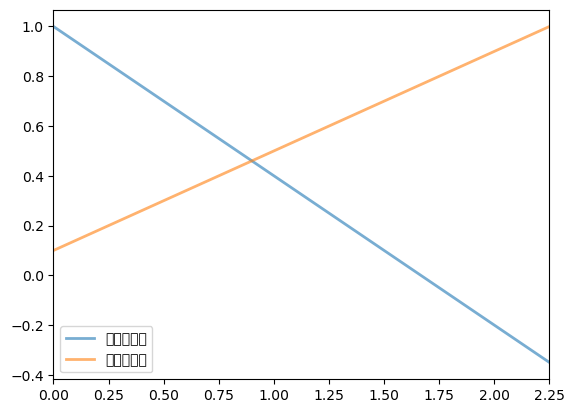

In [17]:
def plot_market(m):
    q_max = (m.d_0 - m.s_0) / min(m.d_1, m.s_1)
    q_grid = np.linspace(0, q_max, 100)
    fig, ax = plt.subplots()
    ax.plot(q_grid, m.d_0 - m.d_1 * q_grid, lw=2, alpha=0.6, label="逆需求曲线")
    ax.plot(q_grid, m.s_0 + m.s_1 * q_grid, lw=2, alpha=0.6, label="逆供给曲线")
    ax.legend()
    ax.set_xlim(0, q_max)
    plt.show()

m = create_market()
plot_market(m)

In [18]:
def compute_equilibrium(m):
    q_star = (m.d_0 - m.s_0) / (m.d_1 + m.s_1)
    p_star = m.d_0 - m.d_1 * q_star
    return p_star, q_star

price, quantity = compute_equilibrium(m)
(price, quantity)

(0.45999999999999996, 0.9)

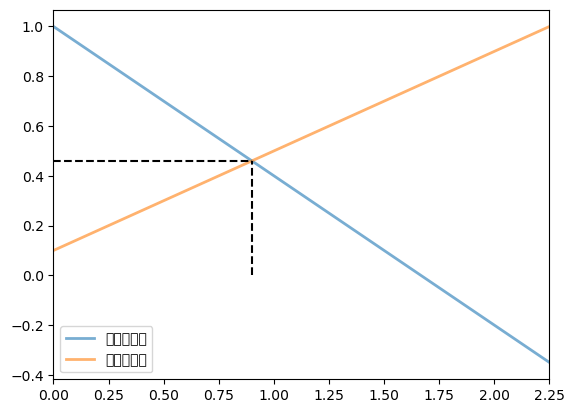

In [19]:
def plot_market_with_equilibrium(m):
    price, quantity = compute_equilibrium(m)
    q_max = (m.d_0 - m.s_0) / min(m.d_1, m.s_1)
    q_grid = np.linspace(0, q_max, 100)
    fig, ax = plt.subplots()
    ax.plot(q_grid, m.d_0 - m.d_1 * q_grid, lw=2, alpha=0.6, label="逆需求曲线")
    ax.plot(q_grid, m.s_0 + m.s_1 * q_grid, lw=2, alpha=0.6, label="逆供给曲线")
    ax.plot((quantity, quantity), (0, price), 'k--')
    ax.plot((0, quantity), (price, price), 'k--')
    ax.legend()
    ax.set_xlim(0, q_max)
    plt.show()
plot_market_with_equilibrium(m)

In [20]:
def compute_welfare(m):
    p_star, q_star = compute_equilibrium(m)
    d = m.d_0 - m.d_1 * np.linspace(0, q_star, 1000)
    s = m.s_0 + m.s_1 * np.linspace(0, q_star, 1000)
    consumer_surplus = np.trapz(d - p_star, dx=q_star/1000)
    producer_surplus = np.trapz(p_star - s, dx=q_star/1000)
    total_welfare = consumer_surplus + producer_surplus
    return consumer_surplus, producer_surplus, total_welfare

consumer_surplus, producer_surplus, total_welfare = compute_welfare(m)
(consumer_surplus, producer_surplus, total_welfare)

(0.24275700000000003, 0.16183799999999995, 0.404595)

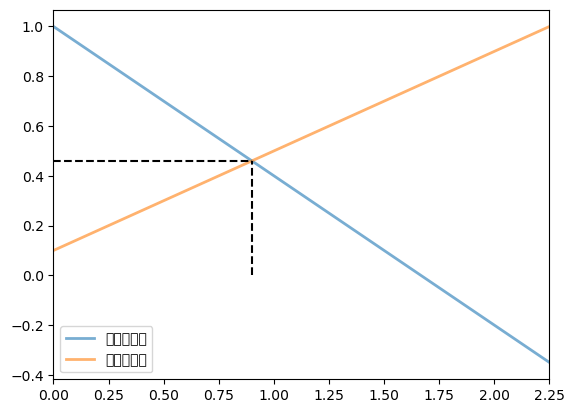

(0.24275700000000003, 0.16183799999999995, 0.404595)

In [21]:
# 定义 Market 类以及创建市场实例的函数
Market = namedtuple('Market', ['d_0', 'd_1', 's_0', 's_1'])

def create_market(d_0=1.0, d_1=0.6, s_0=0.1, s_1=0.4):
    return Market(d_0=d_0, d_1=d_1, s_0=s_0, s_1=s_1)

# 定义绘制市场供需曲线的函数
def plot_market(m):
    q_max = (m.d_0 - m.s_0) / min(m.d_1, m.s_1)
    q_grid = np.linspace(0, q_max, 100)
    fig, ax = plt.subplots()
    ax.plot(q_grid, m.d_0 - m.d_1 * q_grid, lw=2, alpha=0.6, label="逆需求曲线")
    ax.plot(q_grid, m.s_0 + m.s_1 * q_grid, lw=2, alpha=0.6, label="逆供给曲线")
    ax.legend()
    ax.set_xlim(0, q_max)
    plt.show()

# 定义计算均衡价格和数量的函数
def compute_equilibrium(m):
    q_star = (m.d_0 - m.s_0) / (m.d_1 + m.s_1)
    p_star = m.d_0 - m.d_1 * q_star
    return p_star, q_star

# 定义绘制带有均衡点的市场供需曲线的函数
def plot_market_with_equilibrium(m):
    price, quantity = compute_equilibrium(m)
    q_max = (m.d_0 - m.s_0) / min(m.d_1, m.s_1)
    q_grid = np.linspace(0, q_max, 100)
    fig, ax = plt.subplots()
    ax.plot(q_grid, m.d_0 - m.d_1 * q_grid, lw=2, alpha=0.6, label="逆需求曲线")
    ax.plot(q_grid, m.s_0 + m.s_1 * q_grid, lw=2, alpha=0.6, label="逆供给曲线")
    ax.plot((quantity, quantity), (0, price), 'k--')
    ax.plot((0, quantity), (price, price), 'k--')
    ax.legend()
    ax.set_xlim(0, q_max)
    plt.show()

# 定义计算消费者剩余、生产者剩余和总福利的函数
def compute_welfare(m):
    p_star, q_star = compute_equilibrium(m)
    d = m.d_0 - m.d_1 * np.linspace(0, q_star, 1000)
    s = m.s_0 + m.s_1 * np.linspace(0, q_star, 1000)
    consumer_surplus = np.trapz(d - p_star, dx=q_star/1000)
    producer_surplus = np.trapz(p_star - s, dx=q_star/1000)
    total_welfare = consumer_surplus + producer_surplus
    return consumer_surplus, producer_surplus, total_welfare

# 示例使用
m = create_market()
plot_market_with_equilibrium(m)
consumer_surplus, producer_surplus, total_welfare = compute_welfare(m)
(consumer_surplus, producer_surplus, total_welfare)

In [22]:
def inverse_demand(q, model):
    # 计算逆需求
    return model.d_0 - model.d_1 * q

def inverse_supply(q, model):
    # 计算逆供给
    return model.s_0 + model.s_1 * q

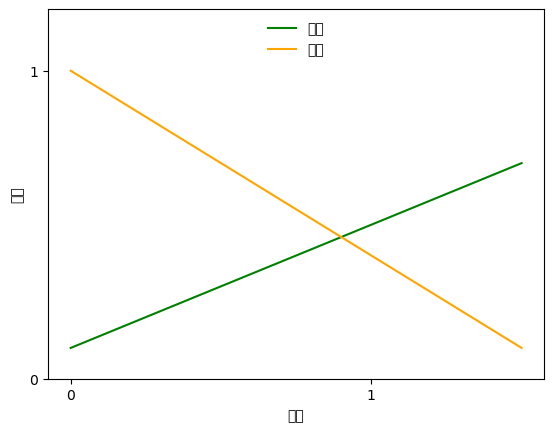

In [23]:
market = create_market()

grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = inverse_supply(q_grid, market)
demand_curve = inverse_demand(q_grid, market)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='供给', color='green')
ax.plot(q_grid, demand_curve, label='需求', color='orange')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

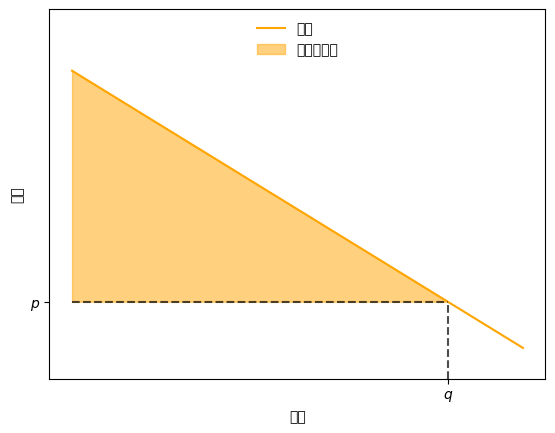

In [24]:
q = 1.25
p = inverse_demand(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, demand_curve, label='需求', color='orange')
ax.fill_between(q_grid[q_grid <= q],
                demand_curve[q_grid <= q],
                ps[q_grid <= q],
                label='消费者剩余',
                color="orange", 
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

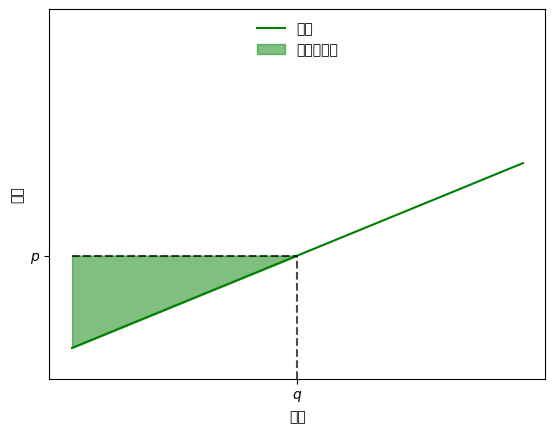

In [25]:
q = 0.75
p = inverse_supply(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='供给', color='green')
ax.fill_between(q_grid[q_grid <= q],
                supply_curve[q_grid <= q],
                ps[q_grid <= q],
                label='生产者剩余',
                color="green",
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

In [26]:
def W(q, market):
    # Compute and return welfare
    return (market.d_0 - market.s_0) * q - 0.5 * (market.d_1 + market.s_1) * q**2

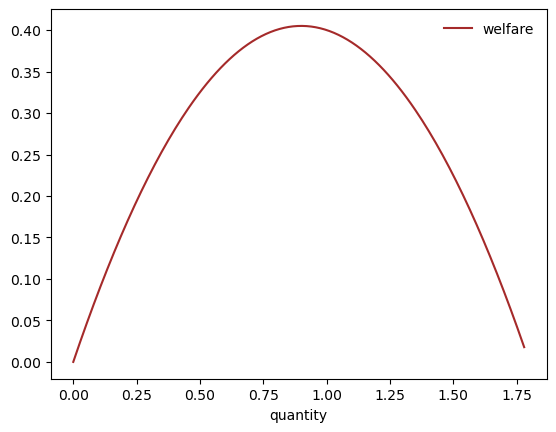

In [27]:
q_vals = np.linspace(0, 1.78, 200)
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='welfare', color='brown')
ax.legend(frameon=False)
ax.set_xlabel('quantity')
plt.show()

In [28]:
def inverse_demand(q, model):
    return model.d_0 - model.d_1 * q**0.6

def inverse_supply(q, model):
    return model.s_0 + model.s_1 * q**1.8

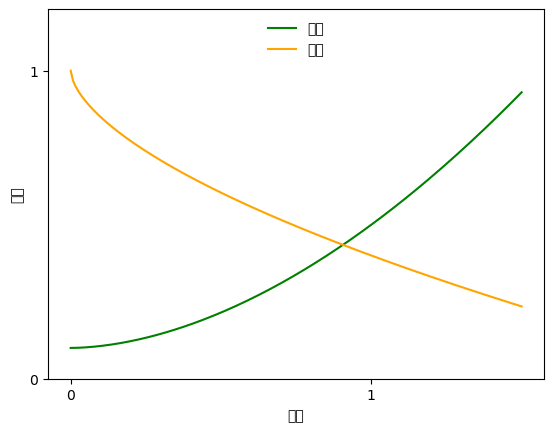

In [29]:
market = create_market()

grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = inverse_supply(q_grid, market)
demand_curve = inverse_demand(q_grid, market)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='供给', color='green')
ax.plot(q_grid, demand_curve, label='需求', color='orange')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

In [30]:
def W(q, market):
    # Compute and return welfare
    S_c = market.d_0 * q - market.d_1 * q**1.6 / 1.6
    S_p = market.s_0 * q + market.s_1 * q**2.8 / 2.8
    return S_c - S_p

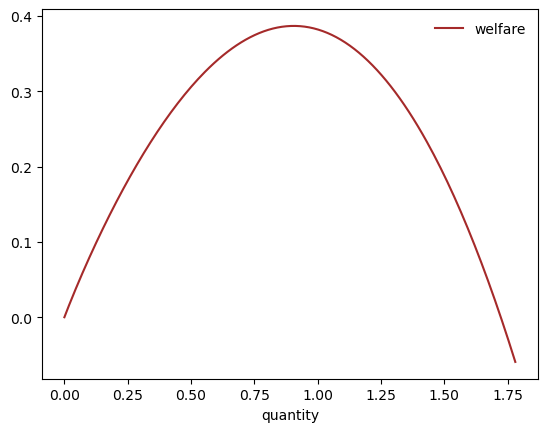

In [31]:
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='welfare', color='brown')
ax.legend(frameon=False)
ax.set_xlabel('quantity')
plt.show()

In [32]:
from scipy.optimize import minimize_scalar

def objective(q):
    return -W(q, market)

result = minimize_scalar(objective, bounds=(0, 10))
print(result.message)

Solution found.


In [33]:
maximizing_q = result.x
print(f"{maximizing_q: .5f}")

 0.90564


In [34]:
from scipy.optimize import newton

def excess_demand(q):
    return inverse_demand(q, market) - inverse_supply(q, market)

equilibrium_q = newton(excess_demand, 0.99)
print(f"{equilibrium_q: .5f}")

 0.90564
